# 7.2 범주형 데이터 이진분류 경진대회 탐색적 데이터 분석

## 7.2.1 데이터 둘러보기

In [2]:
import pandas as pd

# 데이터 경로
data_path = '/kaggle/input/2024-2-data-solution-ch-7-public/'
train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'submission.csv', index_col='id')

In [3]:
train.shape, test.shape

((250000, 24), (50000, 23))

In [4]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [5]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [6]:
submission.head()

,target
id,
250000,0.5
250001,0.5
250002,0.5
250003,0.5
250004,0.5


### 피처 요약표 만들기

In [7]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    summary['? 값'] = df.loc[453].values

    return summary
    
resumetable(train)

데이터 세트 형상: (250000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값,? 값
0,bin_0,int64,0,2,0,0,0,0
1,bin_1,int64,0,2,0,1,0,0
2,bin_2,int64,0,2,0,0,0,1
3,bin_3,object,0,2,T,T,F,T
4,bin_4,object,0,2,Y,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue,Green
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion,Axolotl
8,nom_3,object,0,6,Finland,Russia,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin,Oboe


### 피처 요약표 해석하기

In [8]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [9]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_3 고윳값: ['h' 'a' 'i' 'j' 'e' 'g' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값: ['D' 'A' 'R' 'E' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J' 'N'
 'G' 'W' 'P' 'I' 'C' 'O' 'X' 'M']
ord_5 고윳값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP' 'MV'
 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'qK' 'dh' 'gM' 'Jf' 'fO'
 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'wy' 'qA' 'lL' 'Qh' 'be'
 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut' 'Dx' 'Xi' 'on'
 'sD' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL' 'je' 'hT' 'PQ' 'Bn' 'ex' 'hh' 'ac'
 'rp' 'dE' 'oG' 'cp' 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'rZ'
 'DN' 'TZ' 'ke' 'cG' 'tP' 'ud' 'tv' 'aM' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR'
 'AP' 'GJ' 'Wv' 'Qo' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'Bb' 'mc' 'MC'
 'mm' 'tM' 'NV' 'Bd' 'ih' 'CU' 'IK' 'RP' 'dN' 'us' 'xy' 'dZ' 'yN' 'Dc'
 'Nf' 'Fd' 'QM' 'jV' 'sY' 'wu' 'kC' 'Zq' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'ps'
 'kE' 'MO' 'UO' 'LE' 'BE' 'kw' 'yY' 'zU' 'bJ' 'Kf' 'sn' 'ck' 'mb' 'Ps'
 'Ml' 'Ai' 'SB' '

In [10]:
print('day 고윳값:', train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [2 7 4 3 1 5 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


## 7.2.2 데이터 시각화

In [11]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 타깃 값 분포

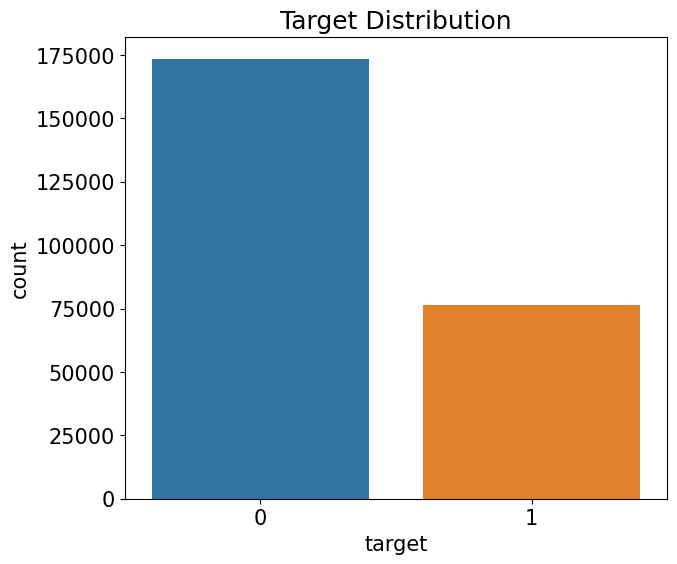

In [12]:
mpl.rc('font', size=15) # 폰트 크기 설정
plt.figure(figsize=(7, 6)) # Figure 크기 설정

# 타깃값 분포 카운트플롯
ax = sns.countplot(x='target', data=train)
ax.set(title='Target Distribution');

In [13]:
rectangle = ax.patches[0] # 첫 번째 Rectangle 객체

print('사각형 높이:', rectangle.get_height())
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형 높이: 173496.0
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [14]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train)*0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 173746.0


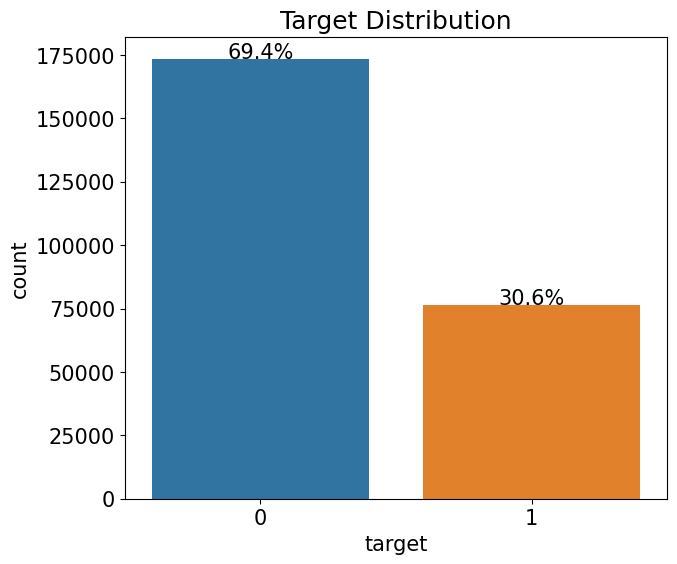

In [15]:
def write_percent(ax, total_size):

    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''

    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율

        # (x, y) 좌표에 텍스트 입력 
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

plt.figure(figsize=(7, 6))
ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');

### 이진 피처 분포

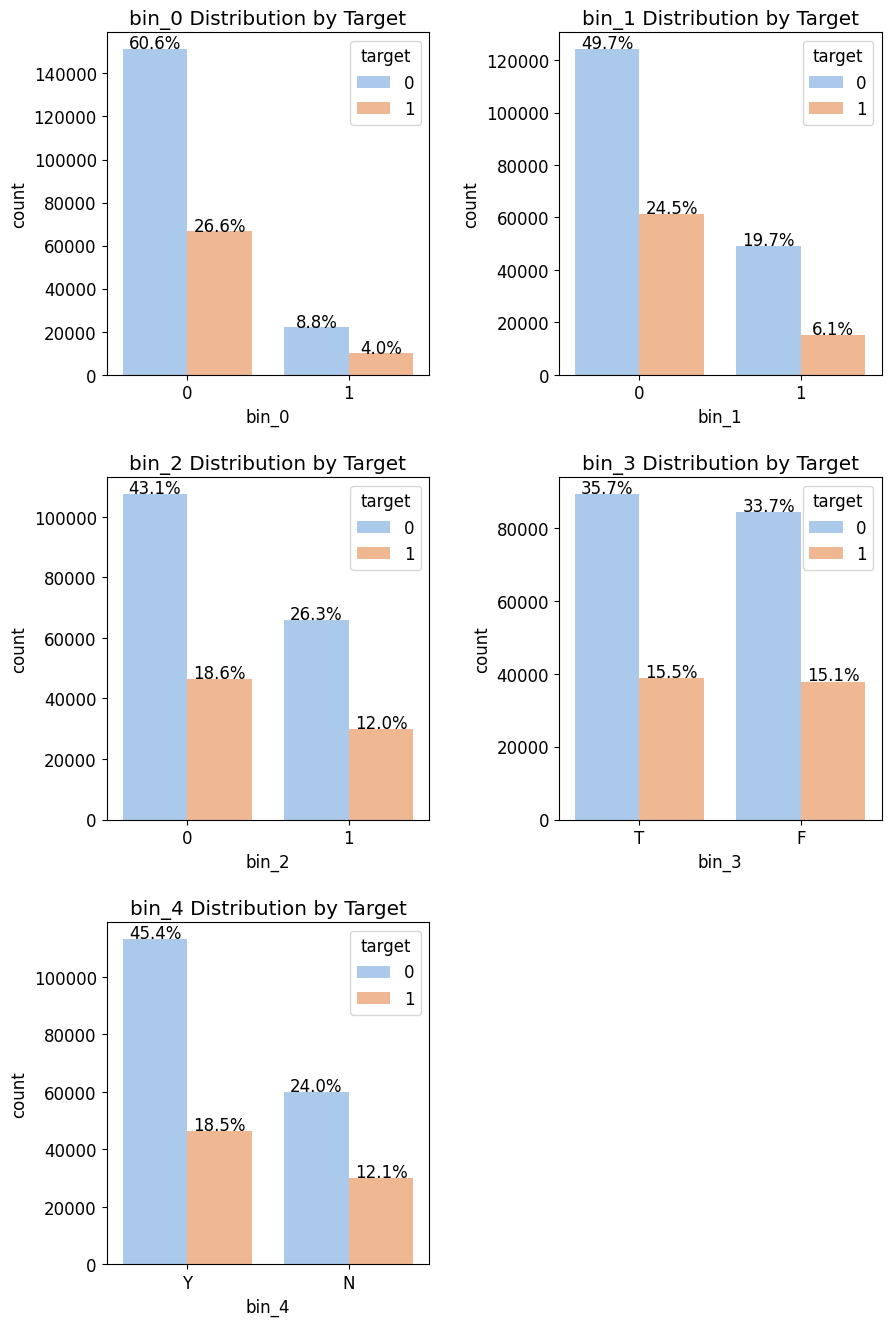

In [16]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치



# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정



# 서브플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] # 피처 목록

for idx, feature in enumerate(bin_features): 
    ax = plt.subplot(grid[idx]) 

    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)
    
    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train))                     # 비율 표시

### 명목형 피처 분포

#### 스텝 1 : 교차분석표 생성 함수 만들기

In [17]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,60550,19285
Green,71520,34793
Red,41426,22426


In [18]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index')*100
crosstab

target,0,1
nom_0,,
Blue,75.843928,24.156072
Green,67.273052,32.726948
Red,64.878156,35.121844


In [19]:
crosstab = crosstab.reset_index() # 인덱스 재설정
crosstab

target,nom_0,0,1
0,Blue,75.843928,24.156072
1,Green,67.273052,32.726948
2,Red,64.878156,35.121844


In [20]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [21]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.843928,24.156072
1,Green,67.273052,32.726948
2,Red,64.878156,35.121844


In [22]:
crosstab[1]

0    24.156072
1    32.726948
2    35.121844
Name: 1, dtype: float64

#### 스텝 2 : 포인트플롯 생성 함수 만들기

In [23]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values, # 포인트플롯 순서
                        color='black')                  # 포인트플롯 색상
                        #legend=False)                   # 범례 미표시
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

#### 스텝 3 : 피처 분포도 및 피처별 타깃값 1의 비율 포인트플롯 생성 함수 만들기

In [24]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, 
                                  size=(15, 20)):
    plt.figure(figsize=size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백 설정


    for idx, feature in enumerate(features): 
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) # 비율 표시
        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

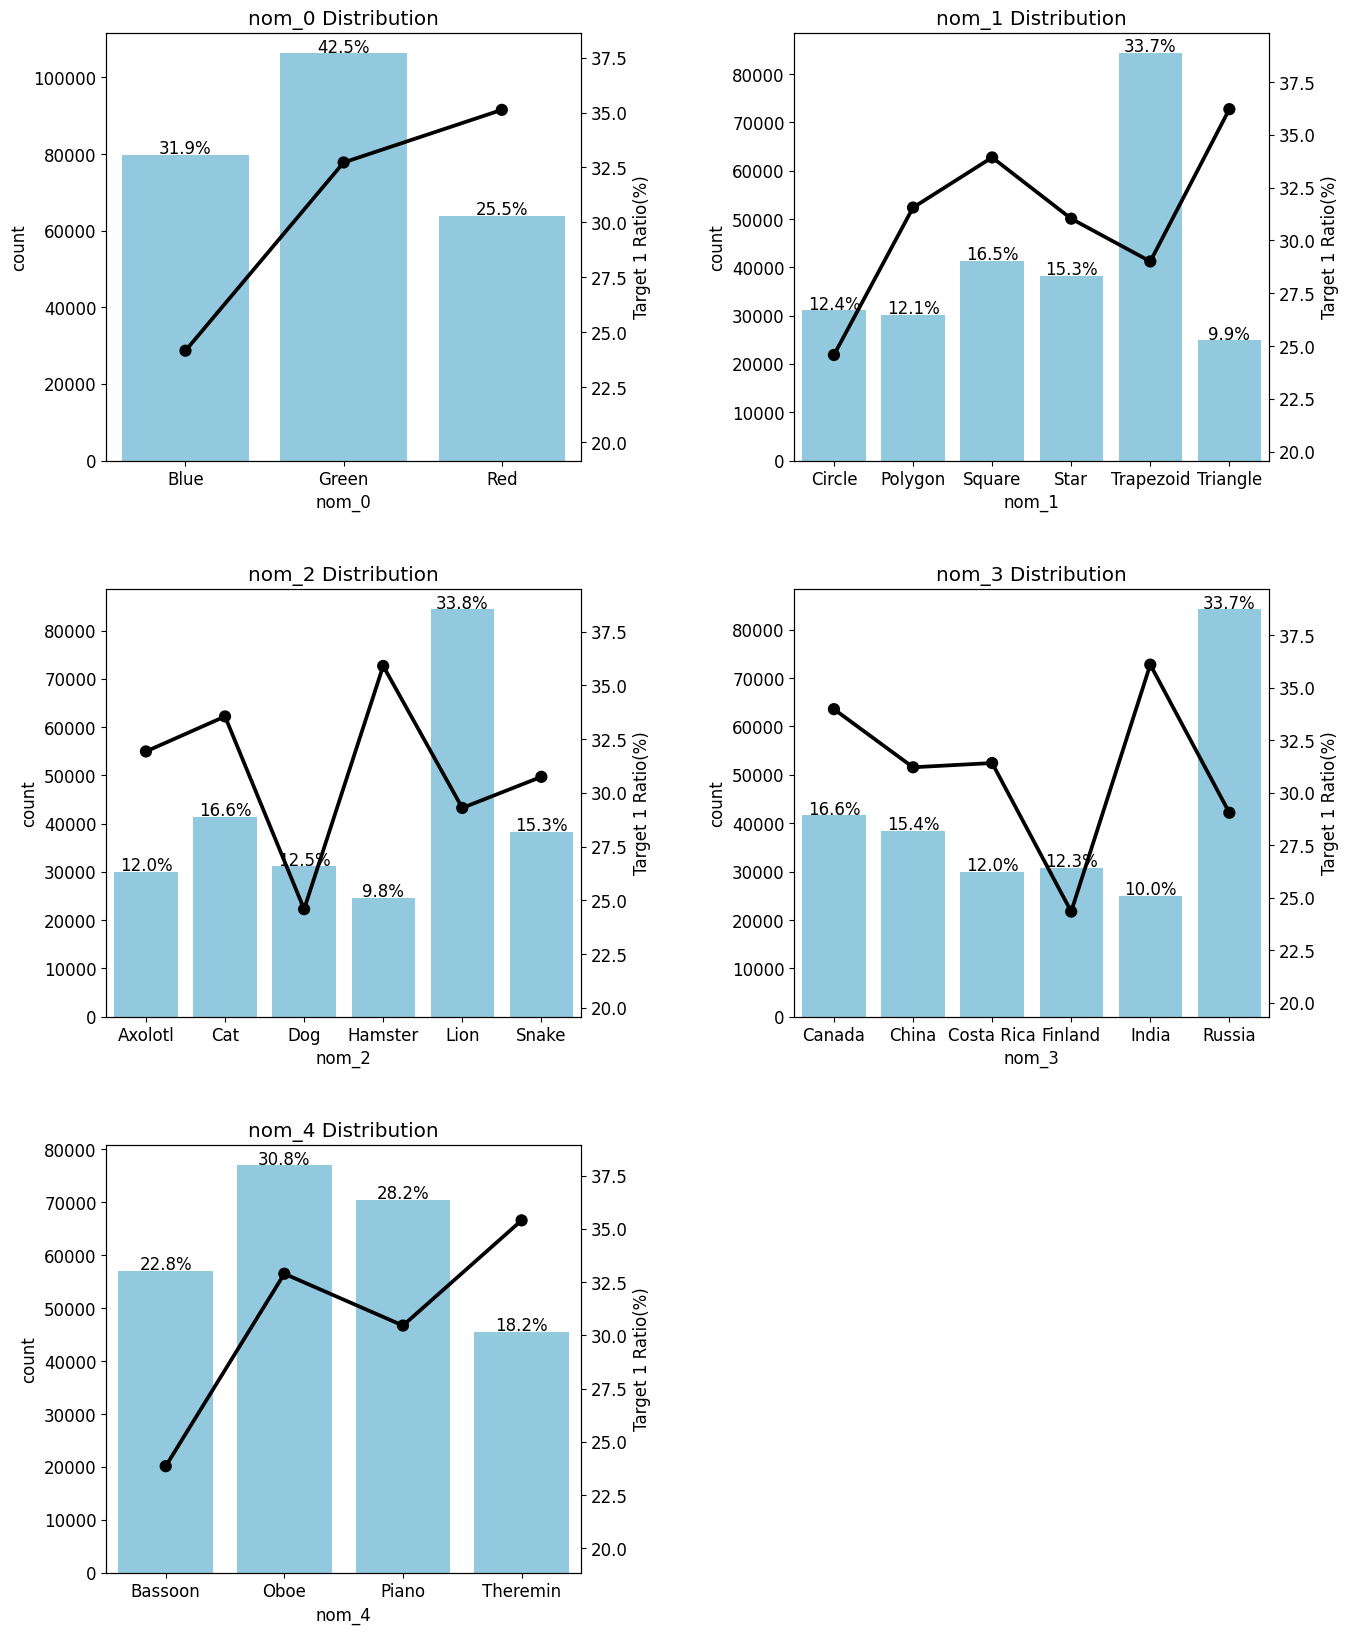

In [25]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] # 명목형 피처
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

### 순서형 피처 분포

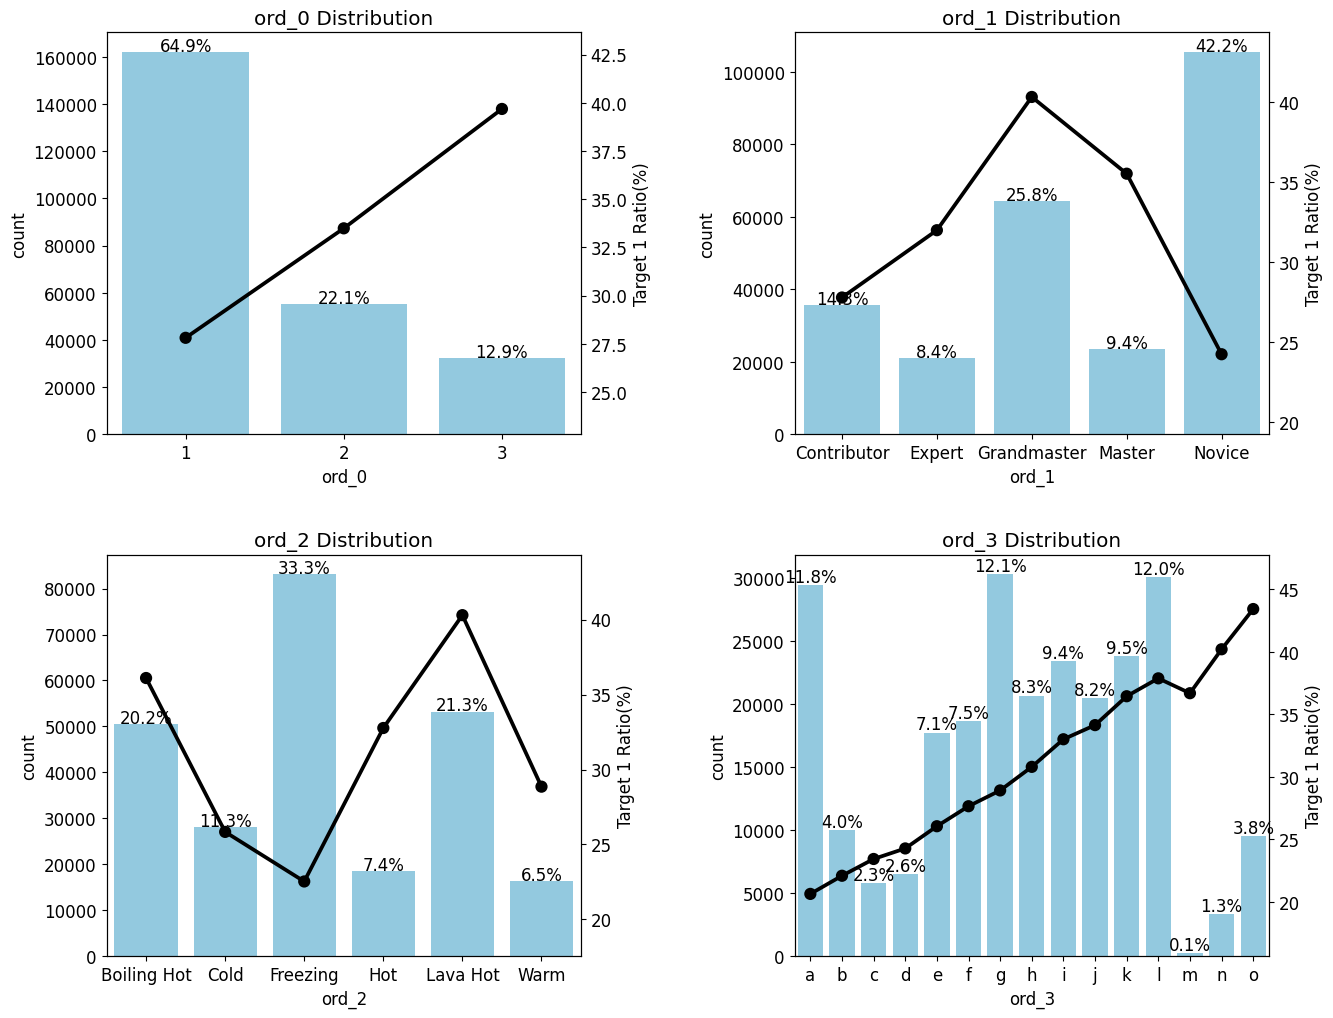

In [26]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

In [27]:
from pandas.api.types import CategoricalDtype 

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

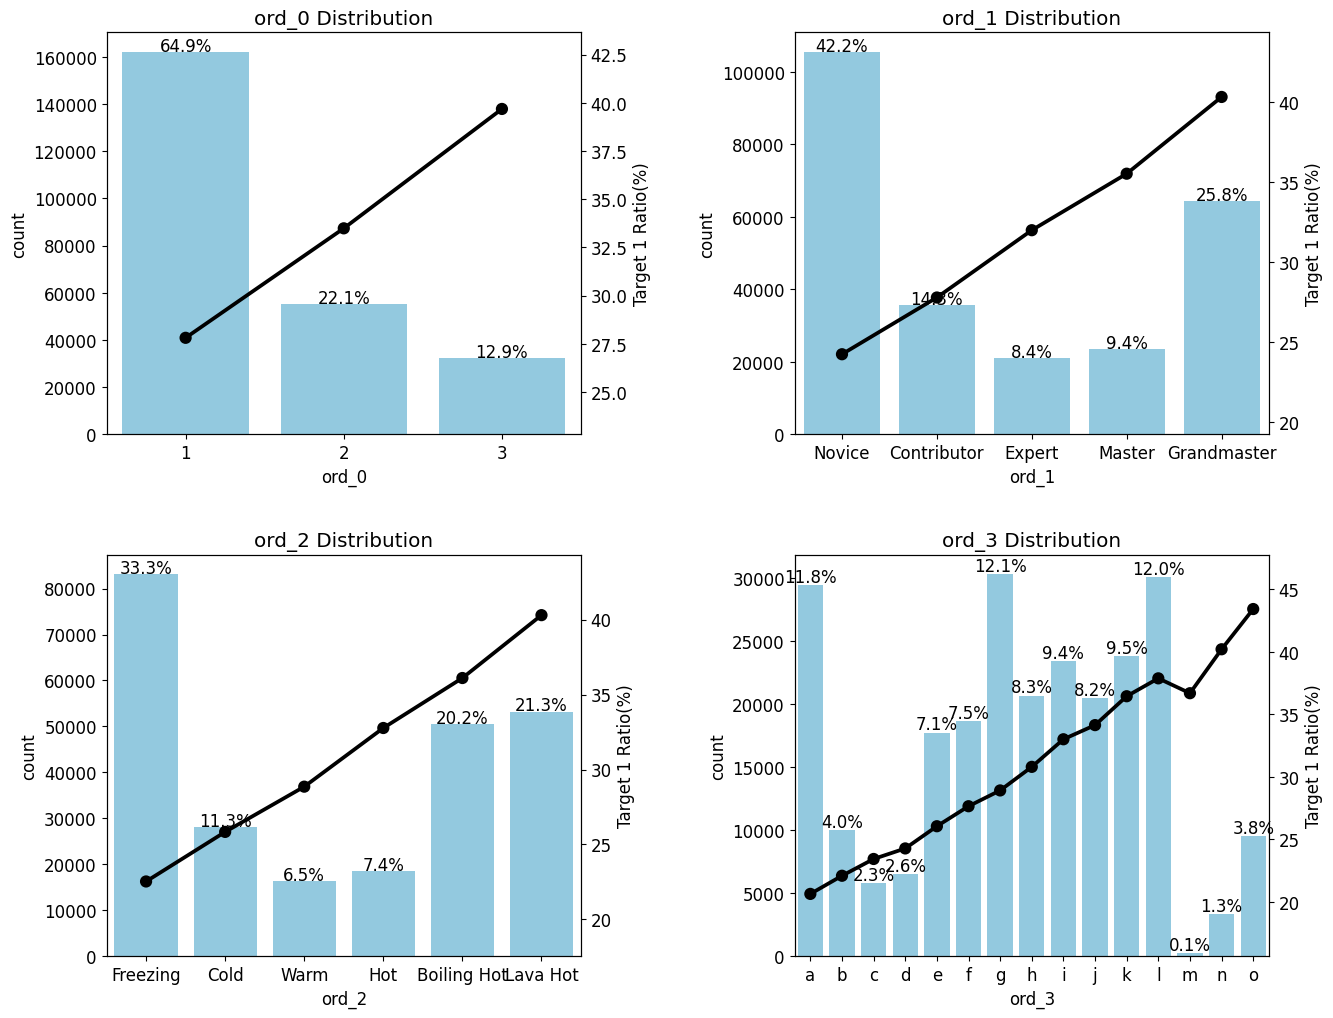

In [28]:
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

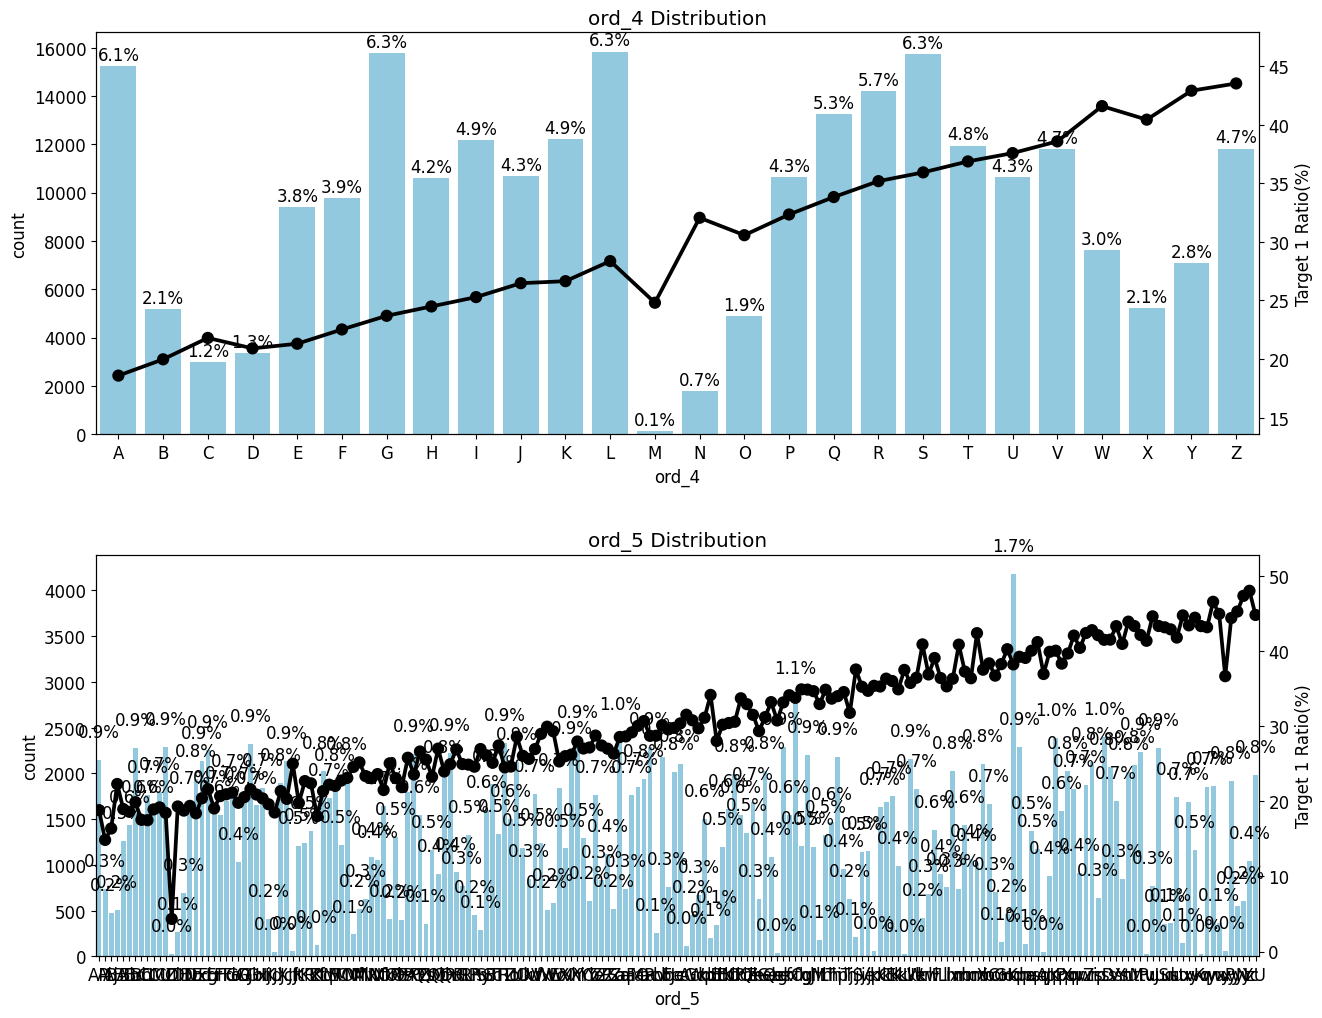

In [29]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], 
                              num_rows=2, num_cols=1, size=(15, 12))

### 날짜 피처 분포

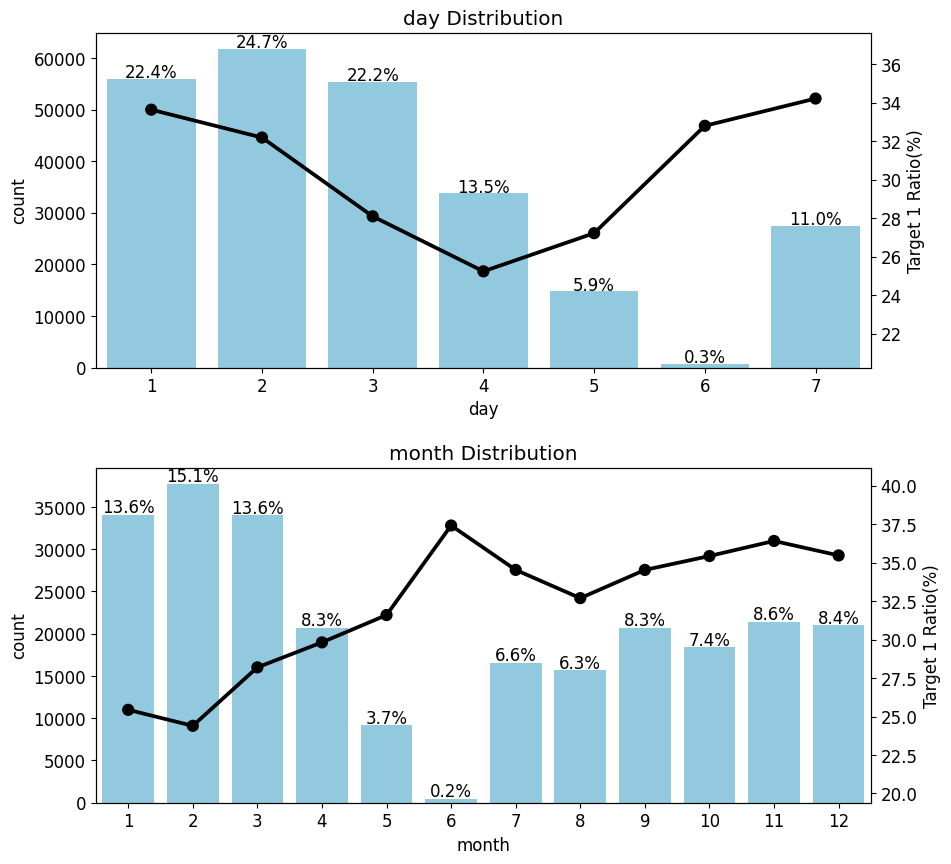

In [30]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, 

                              num_rows=2, num_cols=1, size=(10, 10))

# 7.3 범주형 데이터 이진분류 경진대회 베이스라인 모델

## 7.3.1 피처 엔지니어링

### 데이터 합치기

In [31]:
all_data = pd.concat([train, test]) # 훈련 데이터와 테스트 데이터 합치기 
all_data = all_data.drop('target', axis=1) # 타깃값 제거
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,T,Y,Green,Circle,Cat,Costa Rica,Piano,...,5756bc9bd,670a916fb,1,Grandmaster,Lava Hot,j,L,MC,7,11
299996,0,0,0,F,Y,Red,Circle,Lion,Finland,Piano,...,6706bb896,9332ff270,1,Novice,Warm,f,A,qK,3,11
299997,0,1,0,T,Y,Red,Circle,Hamster,China,Theremin,...,e7ed9ec87,c44609f5a,1,Novice,Freezing,j,K,Qo,5,2


In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder() # 원-핫 인코더 생성
all_data_encoded = encoder.fit_transform(all_data) # 원-핫 인코딩 적용

In [33]:
all_data_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6900000 stored elements and shape (300000, 16461)>

In [34]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_encoded[:num_train] # 0 ~ num_train - 1행
X_test = all_data_encoded[num_train:] # num_train ~ 마지막 행

y = train['target']

In [35]:
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,

                                                      test_size=0.1,

                                                      stratify=y,

                                                      random_state=10)

## 7.3.2 모델 훈련

In [36]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000, random_state=42) # 모델 생성
logistic_model.fit(X_train, y_train) # 모델 훈련

LogisticRegression(max_iter=1000, random_state=42)

## 7.3.3 모델 성능 검증

In [37]:
logistic_model.predict_proba(X_valid)

array([[0.91021292, 0.08978708],
       [0.9449793 , 0.0550207 ],
       [0.66896198, 0.33103802],
       ...,
       [0.55530585, 0.44469415],
       [0.64221294, 0.35778706],
       [0.99261419, 0.00738581]])

In [38]:
logistic_model.predict(X_valid)

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
# 검증 데이터를 활용한 타깃 예측 

y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1]

In [40]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.7971


## 7.3.4 예측 및 결과 제출

In [41]:
# 타깃값 1일 확률 예측
y_preds = logistic_model.predict_proba(X_test)[:, 1]

In [42]:
# 제출 파일 생성

submission['target'] = y_preds
submission['target']
submission.to_csv('submission.csv')

# 과제1

## 실습 및 과제1.1 - 피처 엔지니어링 I : 피처 맞춤 인코딩

In [43]:
# your code here
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})


In [44]:
ord1dict = {'Novice':0, 'Contributor':1,
    'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2,
    'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}
all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

In [45]:
from sklearn.preprocessing import OrdinalEncoder
ord_345 = ['ord_3', 'ord_4', 'ord_5']
ord_encoder = OrdinalEncoder() # OrdinalEncoder 객체생성
# ordinal 인코딩적용
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])
# 피처별인코딩순서출력
for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

In [46]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=True)  # sparse_output=True로 설정
nom_features = ['nom_' + str(i) for i in range(10)] # 명목형피처
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

encoded_nom_df = pd.DataFrame.sparse.from_spmatrix(
    encoded_nom_matrix, columns=onehot_encoder.get_feature_names_out(nom_features)
)

# 기존 데이터에 결합
all_data = all_data.drop(columns=nom_features).join(encoded_nom_df)


In [47]:
encoded_nom_df

,nom_0_Blue,nom_0_Green,nom_0_Red,nom_1_Circle,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Axolotl,...,nom_9_ffc086cfa,nom_9_ffc668c22,nom_9_ffccfc611,nom_9_ffd347754,nom_9_ffd966e07,nom_9_fff13b60a,nom_9_fff1ce319,nom_9_fff4abc0b,nom_9_fffb01c38,nom_9_fffd6e64c
0,0,1.0,0,0,0,0,0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1.0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,1.0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299996,0,0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299997,0,0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299998,1.0,0,0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
date_features = ['day', 'month']  # 날짜 피처

# OneHotEncoder 객체 생성
onehot_encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False로 설정하여 밀집 행렬 반환

# 원-핫 인코딩 적용
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

# 인코딩된 결과를 DataFrame으로 변환 후, 기존 데이터에 결합
encoded_date_df = pd.DataFrame(encoded_date_matrix, columns=onehot_encoder.get_feature_names_out(date_features))
all_data = all_data.drop(columns=date_features).join(encoded_date_df)


In [63]:
print(all_data.columns)

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'ord_0', 'ord_1', 'ord_2',
       'ord_3', 'ord_4',
       ...
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object', length=16215)


## 실습 및 과제1.2 - 피처 엔지니어링 II : 피처스케일링 및 하이퍼파라미터 최적화

In [50]:
from sklearn.preprocessing import MinMaxScaler
ord_features = ['ord_' + str(i) for i in range(6)] # 순서형피처
# min-max 정규화
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

In [51]:
num_train = len(train)

X_train = all_data[:num_train] 
X_test = all_data[num_train:] 
y = train['target']

In [52]:
from sklearn.model_selection import train_test_split
# 훈련데이터, 검증데이터분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
test_size=0.1,
stratify=y,
random_state=10)

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# 데이터 일부 샘플로 실행
X_train_sample = X_train.sample(n=1000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()

# 하이퍼파라미터 값 목록
lr_params = {
    'C': [0.1, 0.125, 0.2],
    'max_iter': [800, 1000],
    'solver': ['liblinear'],
    'random_state': [42]
}

# 랜덤 서치 객체 생성 (n_iter=5로 5개의 조합만 시도)
randomsearch_logistic_model = RandomizedSearchCV(
    estimator=logistic_model,
    param_distributions=lr_params,
    scoring='roc_auc',
    cv=5,
    n_iter=3,
    random_state=42
)

# 랜덤 서치 수행
# 샘플 데이터로 랜덤 서치 수행
randomsearch_logistic_model.fit(X_train_sample, y_train_sample)
print('최적 하이퍼파라미터:', randomsearch_logistic_model.best_params_)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklea

최적 하이퍼파라미터: {'solver': 'liblinear', 'random_state': 42, 'max_iter': 1000, 'C': 0.2}


## 실습 및 과제1.3 - 피처 엔지니어링 III : 검증데이터 훈련 참여

In [54]:
y_valid_preds = randomsearch_logistic_model.best_estimator_.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_auc_score  # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC 계산
roc_auc = roc_auc_score(y_valid, y_valid_preds)
print(f'검증 데이터 ROC AUC: {roc_auc:.4f}')


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


검증 데이터 ROC AUC: 0.7471


# 과제2 - 실습 및 과제 1.1~3에서 제외한 나만의 성능개선 방법을 시도해보고 이에 대해 고찰하라

In [85]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

def resumetable(df):
    summary = []

    for col in df.columns:
        # 데이터 타입
        col_dtype = df[col].dtype

        # 결측치 수
        missing_count = df[col].isna().sum()

        # 고유 값 수
        unique_count = df[col].nunique()

        # 첫 번째, 두 번째, 세 번째 고유 값 (고유 값이 충분하지 않으면 빈칸으로 처리)
        unique_values = df[col].dropna().unique()
        first_value = unique_values[0] if len(unique_values) > 0 else np.nan
        second_value = unique_values[1] if len(unique_values) > 1 else np.nan
        third_value = unique_values[2] if len(unique_values) > 2 else np.nan

        # 엔트로피 계산 (고유값 빈도를 기반으로)
        col_entropy = entropy(df[col].value_counts(normalize=True), base=2) if unique_count > 1 else 0

        # 각 열에 대한 정보를 리스트로 추가
        summary.append([
            col, col_dtype, missing_count, unique_count,
            first_value, second_value, third_value, col_entropy
        ])

    # DataFrame 생성
    summary_df = pd.DataFrame(summary, columns=[
        'Name', 'dtypes', 'Missing', 'Uniques',
        'First Value', 'Second Value', 'Third Value', 'Entropy'
    ])

    return summary_df


In [86]:
all_data = pd.concat([train, test]) # 훈련 데이터와 테스트 데이터 합치기 
all_data = all_data.drop('target', axis=1) # 타깃값 제거
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,T,Y,Green,Circle,Cat,Costa Rica,Piano,...,5756bc9bd,670a916fb,1,Grandmaster,Lava Hot,j,L,MC,7,11
299996,0,0,0,F,Y,Red,Circle,Lion,Finland,Piano,...,6706bb896,9332ff270,1,Novice,Warm,f,A,qK,3,11
299997,0,1,0,T,Y,Red,Circle,Hamster,China,Theremin,...,e7ed9ec87,c44609f5a,1,Novice,Freezing,j,K,Qo,5,2


In [87]:
resumetable(all_data)

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,bin_0,int64,0,2,0,1,NaN,0.550551
1,bin_1,int64,0,2,0,1,NaN,0.821582
2,bin_2,int64,0,2,0,1,NaN,0.960287
3,bin_3,object,0,2,T,F,NaN,0.999599
4,bin_4,object,0,2,Y,N,NaN,0.943694
5,nom_0,object,0,3,Green,Blue,Red,1.553605
6,nom_1,object,0,6,Triangle,Trapezoid,Polygon,2.445716
7,nom_2,object,0,6,Snake,Hamster,Lion,2.444601
8,nom_3,object,0,6,Finland,Russia,Canada,2.445433
9,nom_4,object,0,4,Bassoon,Piano,Theremin,1.972335


In [89]:
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

In [90]:
ord1dict = {'Novice':0, 'Contributor':1,
    'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2,
    'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}
all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

from sklearn.preprocessing import OrdinalEncoder
ord_345 = ['ord_3', 'ord_4', 'ord_5']
ord_encoder = OrdinalEncoder() # OrdinalEncoder 객체생성
# ordinal 인코딩적용
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])
# 피처별인코딩순서출력
for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

In [91]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=True)  # sparse_output=True로 설정
nom_features = ['nom_' + str(i) for i in range(5)] # 명목형피처
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

encoded_nom_df = pd.DataFrame.sparse.from_spmatrix(
    encoded_nom_matrix, columns=onehot_encoder.get_feature_names_out(nom_features)
)

# 기존 데이터에 결합
all_data = all_data.drop(columns=nom_features).join(encoded_nom_df)


In [92]:
# 빈도 인코딩 적용
for col in ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']:
    freq_encoding = all_data[col].value_counts()  # 카테고리별 빈도 계산
    all_data[col + '_freq'] = all_data[col].map(freq_encoding)

# 기존 명목형 변수 제거
all_data = all_data.drop(columns=['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'])


In [93]:
date_features = ['day', 'month']  # 날짜 피처

# OneHotEncoder 객체 생성
onehot_encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False로 설정하여 밀집 행렬 반환

# 원-핫 인코딩 적용
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

# 인코딩된 결과를 DataFrame으로 변환 후, 기존 데이터에 결합
encoded_date_df = pd.DataFrame(encoded_date_matrix, columns=onehot_encoder.get_feature_names_out(date_features))
all_data = all_data.drop(columns=date_features).join(encoded_date_df)


In [94]:
resumetable(all_data)

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,bin_0,int64,0,2,0.0,1.0,NaN,0.550551
1,bin_1,int64,0,2,0.0,1.0,NaN,0.821582
2,bin_2,int64,0,2,0.0,1.0,NaN,0.960287
3,bin_3,int64,0,2,1.0,0.0,NaN,0.999599
4,bin_4,int64,0,2,1.0,0.0,NaN,0.943694
5,ord_0,int64,0,3,2.0,1.0,3.0,1.267257
6,ord_1,int64,0,5,4.0,2.0,0.0,2.049602
7,ord_2,int64,0,6,1.0,3.0,5.0,2.360163
8,ord_3,float64,0,15,7.0,0.0,8.0,3.608077
9,ord_4,float64,0,26,3.0,0.0,17.0,4.506674


In [95]:
from sklearn.preprocessing import MinMaxScaler
ord_features = ['ord_' + str(i) for i in range(6)] # 순서형피처
# min-max 정규화
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

In [96]:
num_train = len(train)

X_train = all_data[:num_train] 
X_test = all_data[num_train:] 
y = train['target']

from sklearn.model_selection import train_test_split
# 훈련데이터, 검증데이터분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
    test_size=0.1,
    stratify=y,
    random_state=10)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklea

최적 하이퍼파라미터: {'solver': 'liblinear', 'random_state': 42, 'max_iter': 1000, 'C': 0.2}


In [97]:
from xgboost import XGBClassifier

# XGBoost 모델 생성
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# XGBoost 하이퍼파라미터 값 목록
xgb_params = {
    'n_estimators': [100, 200, 300],   # 트리 개수
    'max_depth': [3, 6, 10],           # 최대 깊이
    'learning_rate': [0.01, 0.1, 0.2], # 학습률
    'subsample': [0.7, 0.8, 1.0],      # 샘플링 비율
    'colsample_bytree': [0.7, 0.8, 1.0] # 특성 샘플링 비율
}

# 랜덤 서치 객체 생성
randomsearch_xgb_model = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    scoring='roc_auc',
    cv=5,
    n_iter=3,
    random_state=42
)

# XGBoost로 랜덤 서치 수행
randomsearch_xgb_model.fit(X_train, y_train)
print('최적 하이퍼파라미터 (XGBoost):', randomsearch_xgb_model.best_params_)


최적 하이퍼파라미터 (XGBoost): {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [98]:
y_valid_preds = randomsearch_xgb_model.best_estimator_.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_auc_score  # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC 계산
roc_auc = roc_auc_score(y_valid, y_valid_preds)
print(f'검증 데이터 ROC AUC: {roc_auc:.4f}')


검증 데이터 ROC AUC: 0.7746


In [101]:
# 타깃값 1일 확률 예측
y_preds_proba = randomsearch_xgb_model.predict_proba(X_test)[:, 1]

# 확률이 0.5 이상이면 1, 그렇지 않으면 0으로 변환
y_preds_binary = (y_preds_proba >= 0.5).astype(int)

# 제출 파일 생성
submission['target'] = y_preds_binary
submission.to_csv('submission.csv', index=False)

In [102]:
submission

,target
id,
250000,0
250001,0
250002,0
250003,0
250004,0
...,...
299995,0
299996,0
299997,0
